In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Galton_watson(θ, ys, y, z, generations, phenotypes, Tₑ):
    Sθ=np.cumsum(θ,axis=1) 
    
    
    for gen in range(generations+1):     #loop over the generations
        w = np.zeros((phenotypes,npar),int) #count the number of transitions occuring in a genaration
        
        for phenotype in range(phenotypes):
            ys[phenotype, gen, sim] = y[phenotype] #current population
             
            #for yi in range(y[phenotype]): #loop over the current populations
            w, z = update_phenotypic_population(y[phenotype], Sθ, w, z, phenotype)
                
        #update the population
        #print("ynew: ", y+np.array([np.sum(w*Tₑ), np.sum(w*np.roll(Tₑ,1,axis=0))]) ,"\n")
        #y += -w[::,0] -w[::,2] + np.roll(w[::,2],1) +w[::,3] + np.roll(w[::,4],1) -w[::,5] + 2*np.roll(w[::,5],1) old update
        #print("y: ", y ,"\n")
        y += np.array([np.sum(w*Tₑ), np.sum(w*np.roll(Tₑ,1,axis=0))])
        
            
    return ys, y, z    

In [3]:
def update_phenotypic_population(yi, Sθ, w, z, phenotype):
    for c in range(yi): #loop over the cells
        r = np.random.random()
        transition = 0
        done = True
        while done: 
            if r >= Sθ[phenotype,transition]:
                transition += 1
            else:
                w[phenotype,transition] +=1 #count the num of transition in a single generation
                z[phenotype,transition] +=1 #the same but during the entire population history
                done = False
    return w, z

main

In [4]:
phenotypes = 2 #num of phenotypes
#set parameters for each phenotype 
npar = 6 #paramters for each phenotype
α0=0.1; α1=0.; α2=0.2; α3=0.7; α4=0.; α5=0. 
β0=0.2; β1=0.5; β2=0.3; β3=0.0; β4=0.; β5=0.
α = np.array([α0,α1,α2,α3,α4,α5])
β = np.array([β0,β1,β2,β3,β4,β5]) 
θ = np.array([α,β])
print("check for normalizations: ", np.cumsum(θ,axis=1)[::,-1])

Tₑ = np.array([[-1,0,-1,1,0,-1],[0,0,1,0,1,2]])
print("transition effect matrix Tₑ: \n", Tₑ )
# generations
generations = 8
simulations = 100
ys =np.zeros((phenotypes,generations+1,simulations),int)

for sim in range(simulations):
    y=np.array([1,0]) # initial population (we can put also a random number between 1 or 2 like in the Fede experiment)
    z=np.zeros((phenotypes,npar),int) #count transitions
    ys, y, z = Galton_watson(θ, ys, y, z, generations, phenotypes, Tₑ)

check for normalizations:  [1. 1.]
transition effect matrix Tₑ: 
 [[-1  0 -1  1  0 -1]
 [ 0  0  1  0  1  2]]


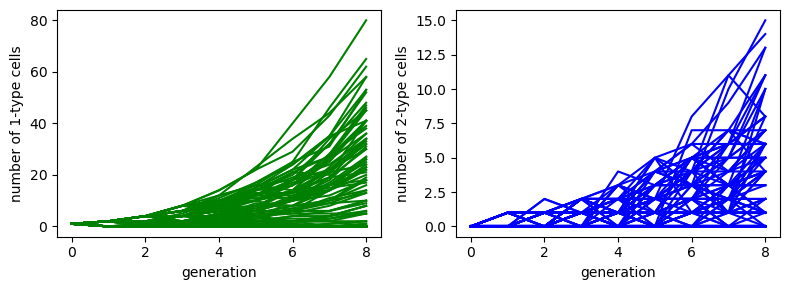

In [13]:
fig = plt.subplots(1,2, figsize=(8,3));
plt.subplot(1,2,1)
plt.plot(ys[0], color="green");
plt.xlabel("generation")
plt.ylabel("number of 1-type cells")

plt.subplot(1,2,2)
plt.plot(ys[1], color="blue");
plt.xlabel("generation")
plt.ylabel("number of 2-type cells")
plt.tight_layout()

In [22]:
#save data (save a dataset for each population)
np.savetxt('dataGW/GW2_Y1_gen'+str(generations)+'_num_sim'+str(simulations)+'_a'+str(α)+'_b'+str(β)+'.txt', ys[0],  fmt='%4d')
np.savetxt('dataGW/GW2_Y2_gen'+str(generations)+'_num_sim'+str(simulations)+'_a'+str(α)+'_b'+str(β)+'.txt', ys[1],  fmt='%4d')

In [9]:
ys[0].mean(axis=1) #empirical mean
ys[1].mean(axis=0) #empirical mean
y0avg = (0*α0 + 1*α1 + 2*α3)**np.arange(generations) #theoretical avg
y1avg = (0*β0 + 1*β1 + 2*β3)**np.arange(generations)

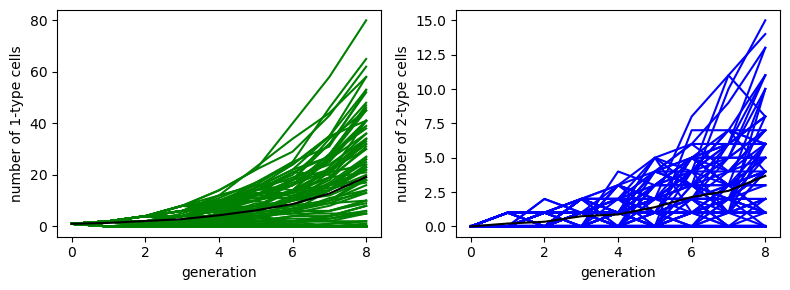

In [15]:
fig = plt.subplots(1,2, figsize=(8,3));

plt.subplot(1,2,1)
plt.plot(ys[0], color="green");
plt.plot(ys[0].mean(axis=1), color="black")
#plt.plot(y0avg, color="blue")
plt.xlabel("generation")
plt.ylabel("number of 1-type cells")

plt.subplot(1,2,2)
plt.plot(ys[1], color="blue");
plt.plot(ys[1].mean(axis=1), color="black")
#plt.plot(y1avg, color="blue")
plt.xlabel("generation")
plt.ylabel("number of 2-type cells")
plt.tight_layout()